## Fraud Detection Trained Model 

Banking frauds have risen to a great extent over the past few years. The most common fraud occurs with the credit cards. It is a concerning issue for both banks and customers as it may result in financial loses for both and banks may lose their credibility. Machine Learning can help banks by detecting the fraudlent trasnactions and taking necessary actions immediately. It reduces the time-consuming manual reviews and hefty fees related to denial of legitimate transactions.  

This jupyter notebook is designed to predict a transaction as a <b><i>normal</i></b> or a <b><i>fraud</i></b> transaction based on a series of values. The data is preprocessed before analysis using pandas and numpy. Machine learning models are used for the detection.

The models used in the notebook include:

1. <b>Logistic Regression</b>: the logistic model is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables.

2. <b>Decision Tree Classifier</b>: The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

3. <b>Random Forest Classifier</b>: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

4. <b>KNN Classifier</b>: In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


The graphs for analysis are plotted using <b>Matplotlib</b> and <b>seaborn</b>. It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

The GUI for the model is built using Tkinter library. Tkinter is the standard GUI library for Python. Python when combined with Tkinter provides a fast and easy way to create GUI applications. Tkinter provides a powerful object-oriented interface to the Tk GUI toolkit.


## Dataset Description

The dataset used in this notebook can be found at https://drive.google.com/file/d/1WFMcTnMykqyF9kNOIiM8g64pqKDQMAuH/view?usp=sharing

The dataset consists of transactions done by credit cards by European cardholders over 2 days. Out of the 284807 transactions processed, 492 were reported to be fraudlent. Our dataset is highly unbalanced as it has 0.173% data reported to be frauds of the total transactions.  

The description for the columns is described below:

Columns named with <b>V1-V28</b> are the 29 series of values which are obtained using PCA to maintain confidentiality. These values are associated with the transaction.

The column <b>'Amount'</b> represents the amount of the transaction. 

The feature <b>'Class'</b> containes integers 0(Normal transaction) or 1(Fraud transaction).

The GUI built using tkinter asks for the series of numbers from the user and displays the results for the transaction after analysis. 


## Data Analysis

In [1]:
#Importing the required modules
import pandas as pd
import seaborn as sns

#Reading the database from csv file
data = pd.read_csv('creditcard.csv')
pd.options.display.max_columns = None

In [2]:
#Displaying the data set
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#Getting the transactions reported to be fraud
data[data['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


As observed from the above cell, 492 transactions out of the 284807 transactions are reported to be fraudulent. It clearly shows that out dataset is highly imbalanced. If our model gets trained on this dataset, it will be ineffective and our algorithm will overfit as it will consider most of the transactions to be normal.

##### Retrieveing information about our dataset

In [4]:
#Displaying the information of the database structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Dropping the Time column as we don't need that
data = data.drop(['Time'], axis=1)

#Displaying the first 5 rows of the dataset
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Describing the dataset
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Boxplot to detect the outliers and Handling outliers

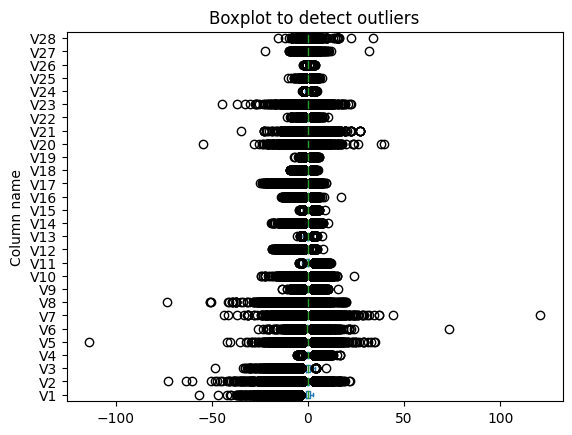

In [7]:
#Creating a copy of dataframe
temp_df = data.copy()

#Removing 'Amount' and 'Class' column from the dataframe as these could be legitimate values
temp_df = temp_df.drop(['Amount'], axis=1)
temp_df = temp_df.drop(['Class'], axis=1)

#Plotting the graph
plt1 = temp_df.plot(kind='box', vert=False, ylabel='Column name', title='Boxplot to detect outliers')


After analyzing the boxplot, it can be seen that there are some outliers present in our dataset which need to be fixed before the model training as it may reduce our accuracy score. I am going to use the InterQuartile Range (IQR) to replace the outliers with high quartile limits and lower quartile limits. 

In [8]:
#Importing the numpy library
import numpy as np

#Creating a function to replace the outlier values
def replace_outliers_IQR(df, columns):
    for c in columns:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        high_lim = q3 + 1.5*iqr
        
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))

#Creating an array of columns having outliers
outlier_cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']

#Calling the function to replace the outliers
replace_outliers_IQR(data, outlier_cols)



Verifying using a boxplot if all the outliers are removed.

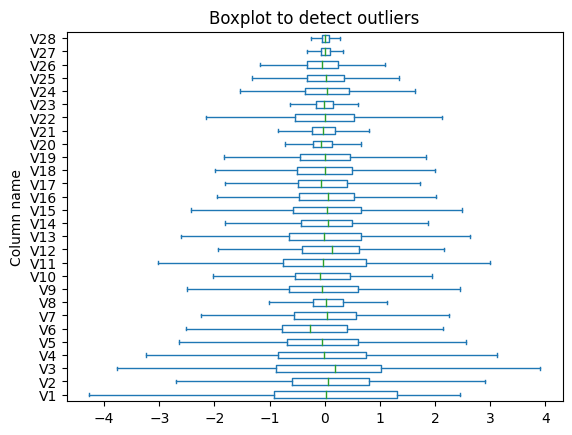

In [9]:
#Creating a copy of the database
df1 = data.copy()
df1 = df1.drop(['Class'], axis=1)
df1 = df1.drop(['Amount'], axis=1)

#Plotting the graph
plt1 = df1.plot(kind='box', vert=False, ylabel='Column name', title='Boxplot to detect outliers')


All the outliers are removed from the dataset. We can move further with our cleaned dataset now. 



#### Feature Distribution

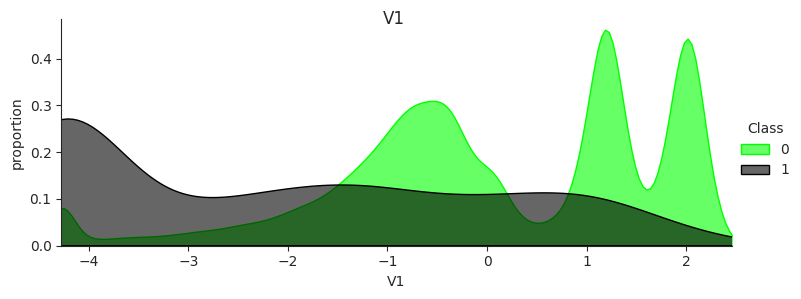

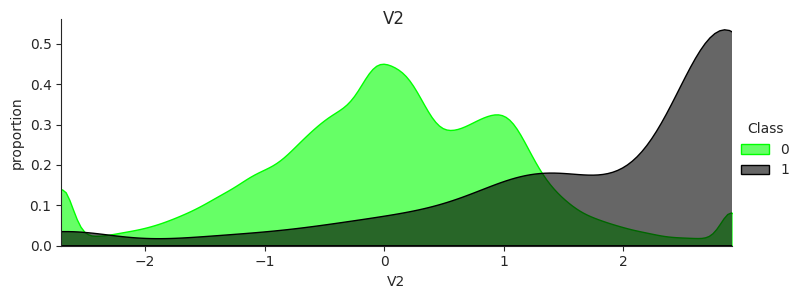

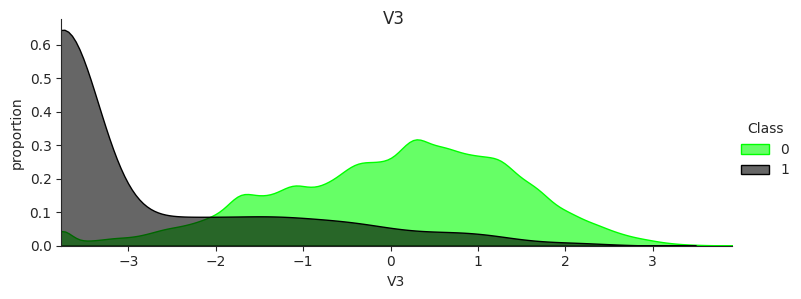

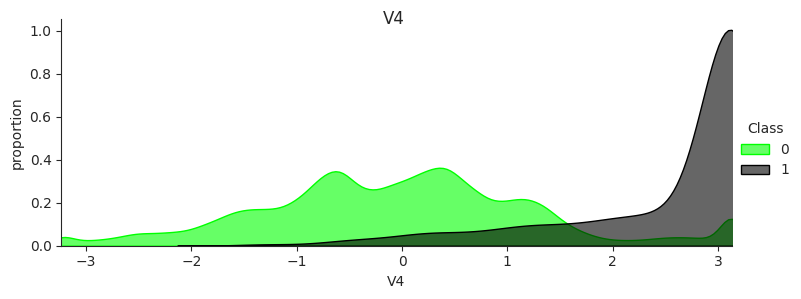

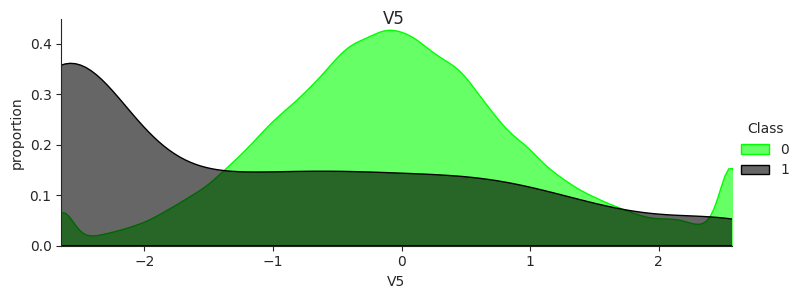

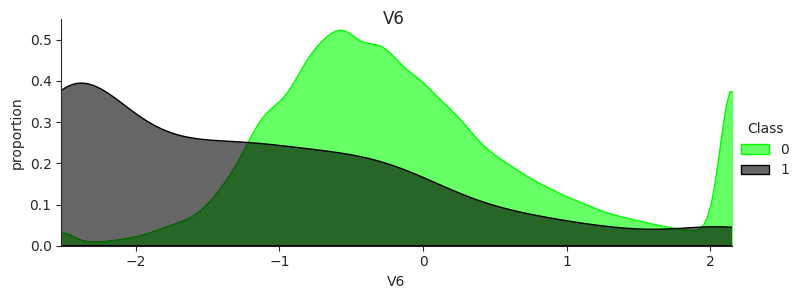

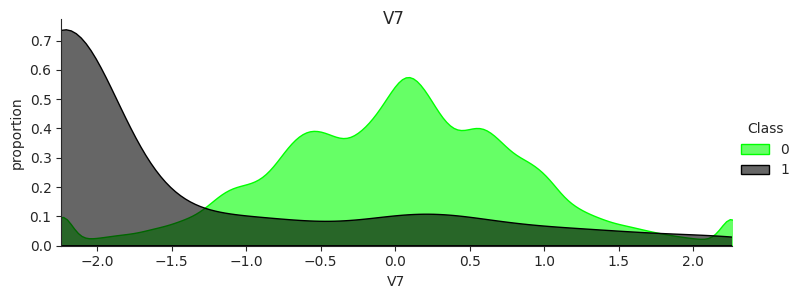

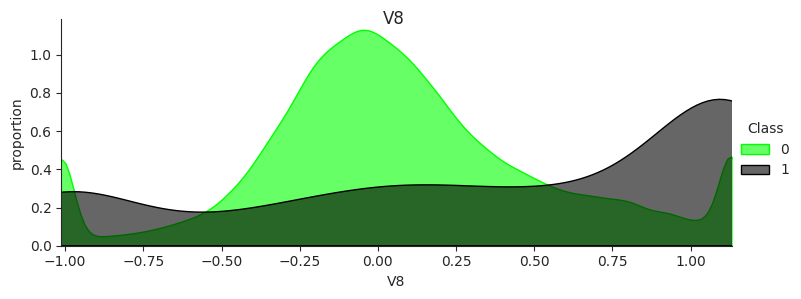

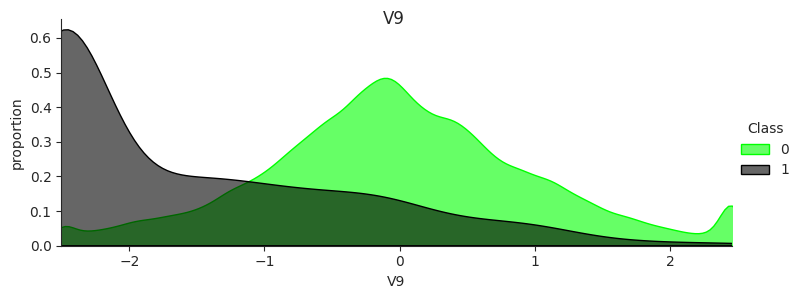

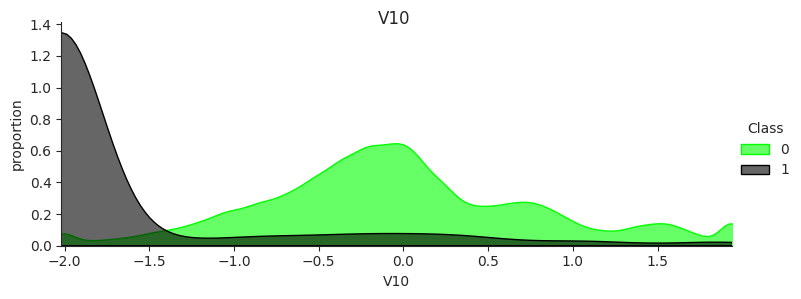

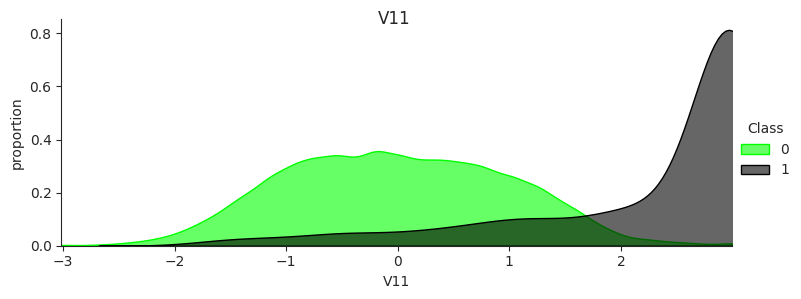

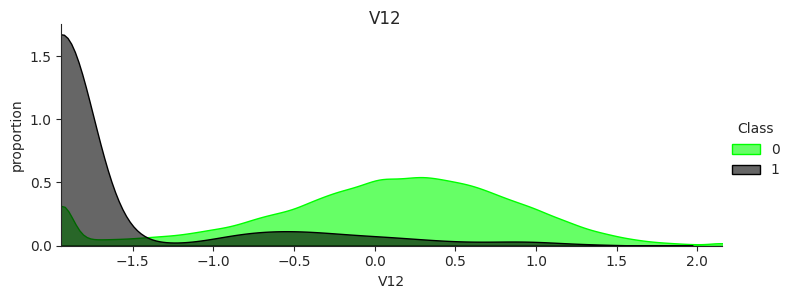

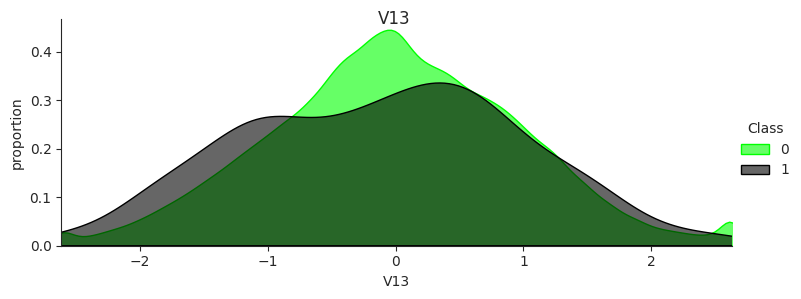

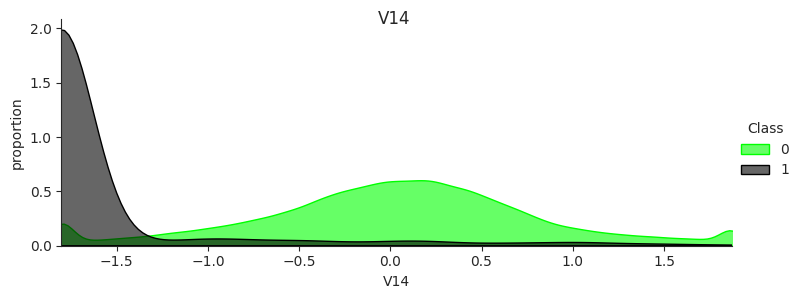

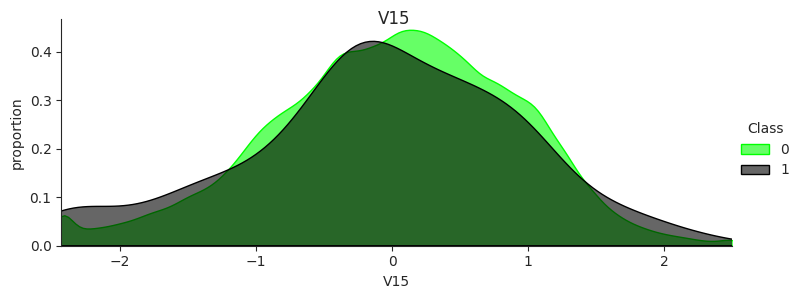

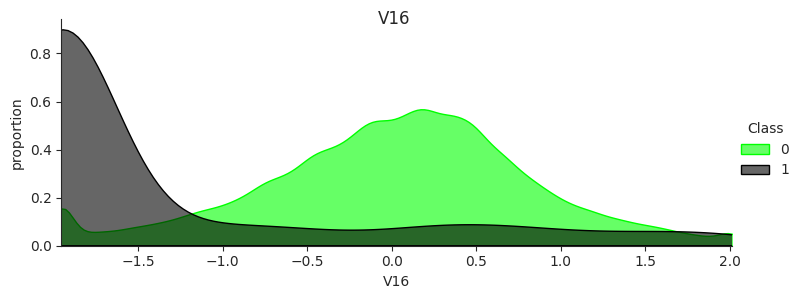

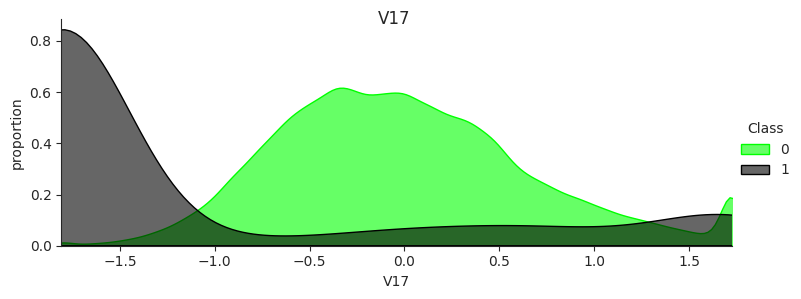

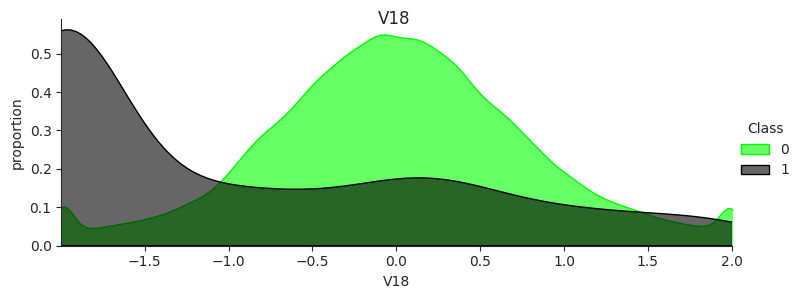

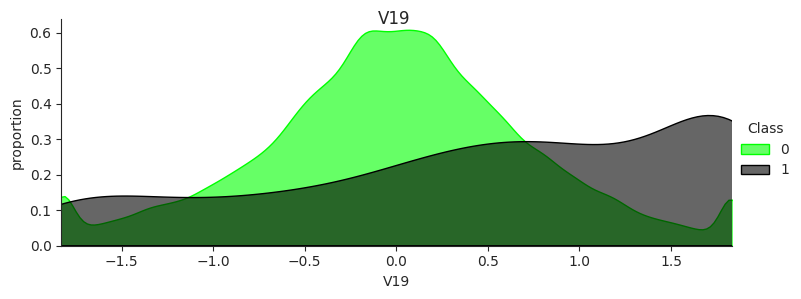

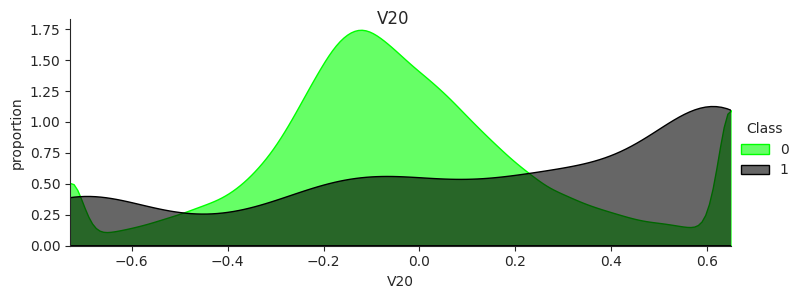

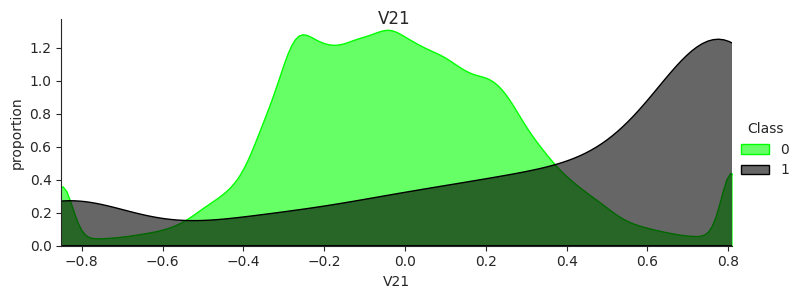

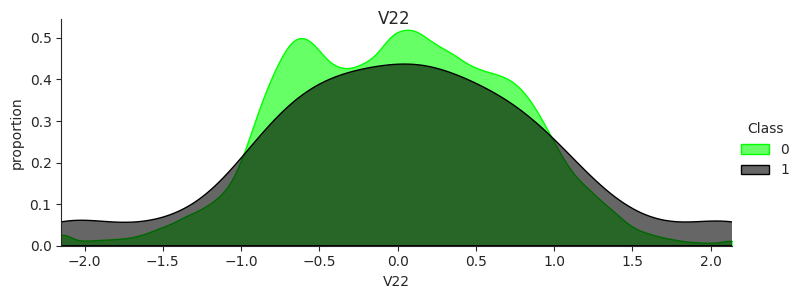

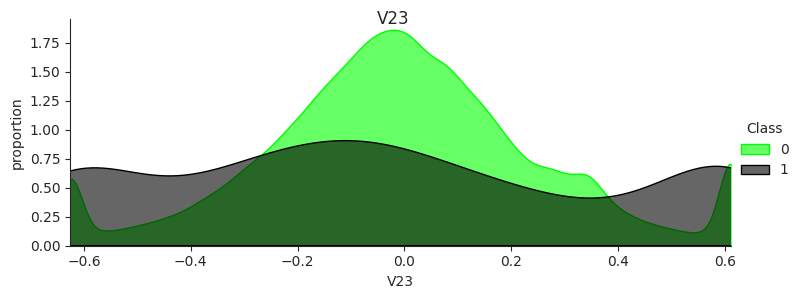

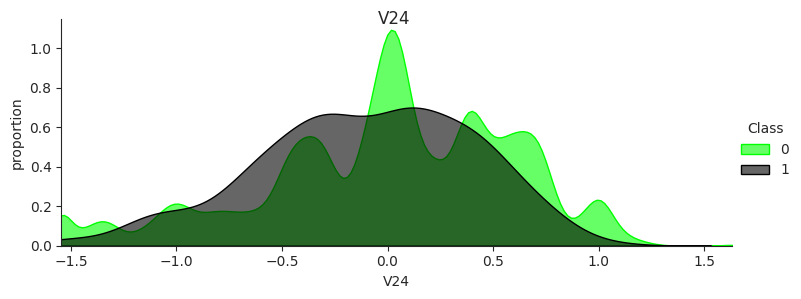

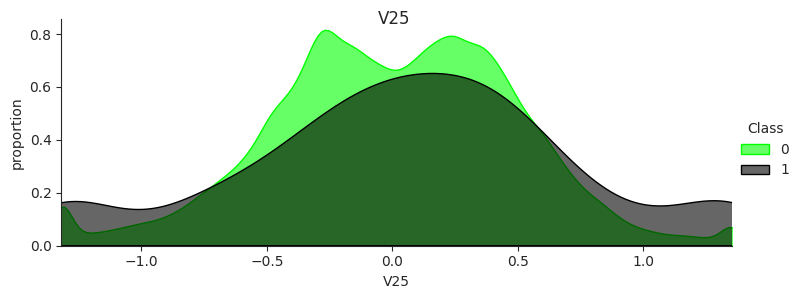

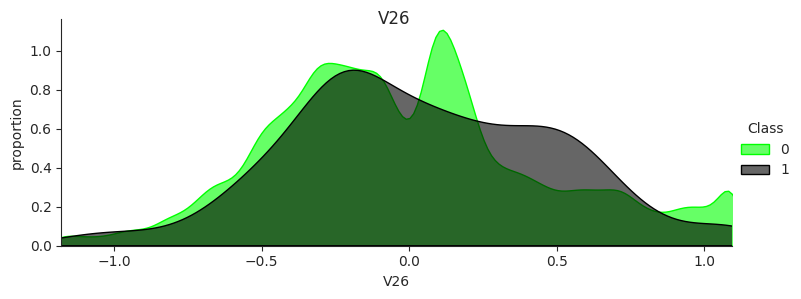

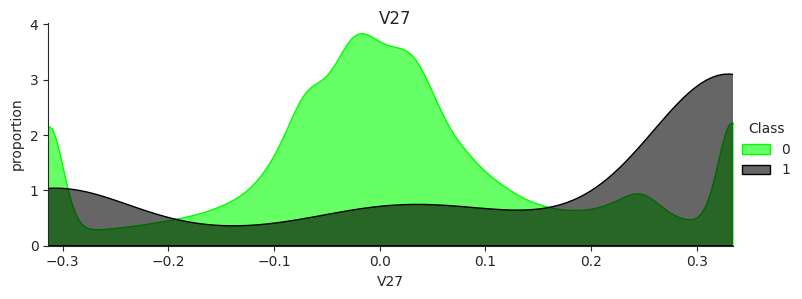

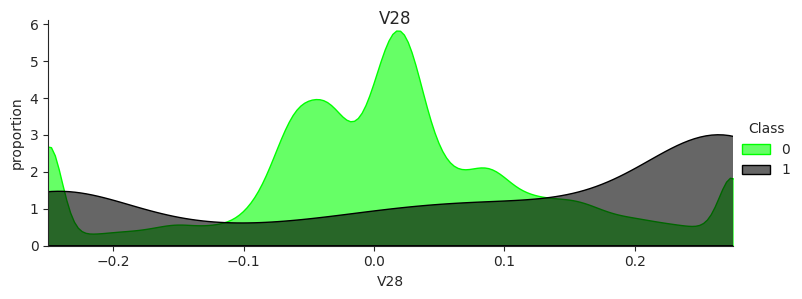

In [10]:
#Importing the required libraries
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Creating a function to plot the graphs
def plot_distribution(data_select) : 
    figsize =( 15, 8)
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue = 'Class',aspect = 2.5, palette ={0 : 'lime', 1 :'black'})
    s.map(sns.kdeplot, data_select, fill = True, alpha = 0.6)
    s.set(xlim=(data[data_select].min(), data[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()

#List of columns for which the graph will be plotted
cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']

#Calling the functions
plot_distribution('V1')
plot_distribution('V2')
plot_distribution('V3')
plot_distribution('V4')
plot_distribution('V5')
plot_distribution('V6')
plot_distribution('V7')
plot_distribution('V8')
plot_distribution('V9')
plot_distribution('V10')
plot_distribution('V11')
plot_distribution('V12')
plot_distribution('V13')
plot_distribution('V14')
plot_distribution('V15')
plot_distribution('V16')
plot_distribution('V17')
plot_distribution('V18')
plot_distribution('V19')
plot_distribution('V20')
plot_distribution('V21')
plot_distribution('V22')
plot_distribution('V23')
plot_distribution('V24')
plot_distribution('V25')
plot_distribution('V26')
plot_distribution('V27')
plot_distribution('V28')

##### Correlation Matrices

/tmp/ipykernel_144883/2042355045.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


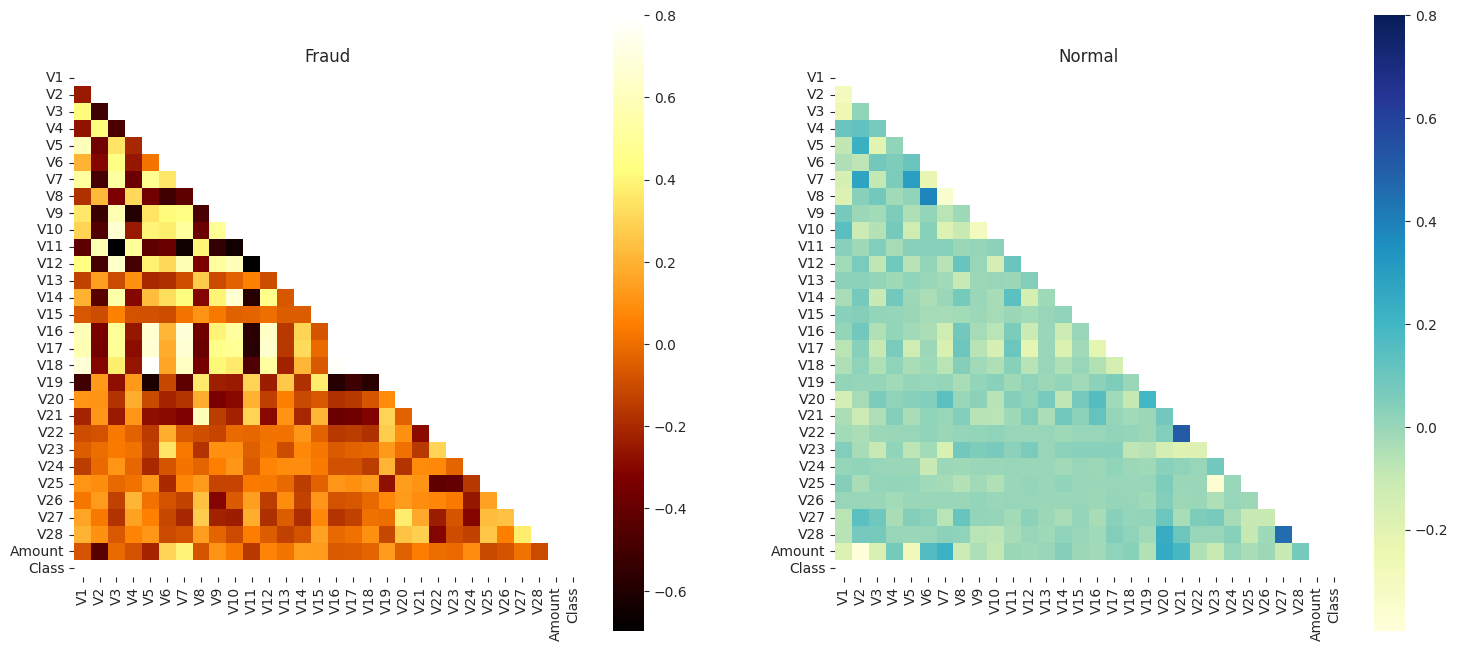

In [11]:
# Creating the correlation matrices for Fraud and Normal Transactions

f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((data.loc[data['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((data.loc[data['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

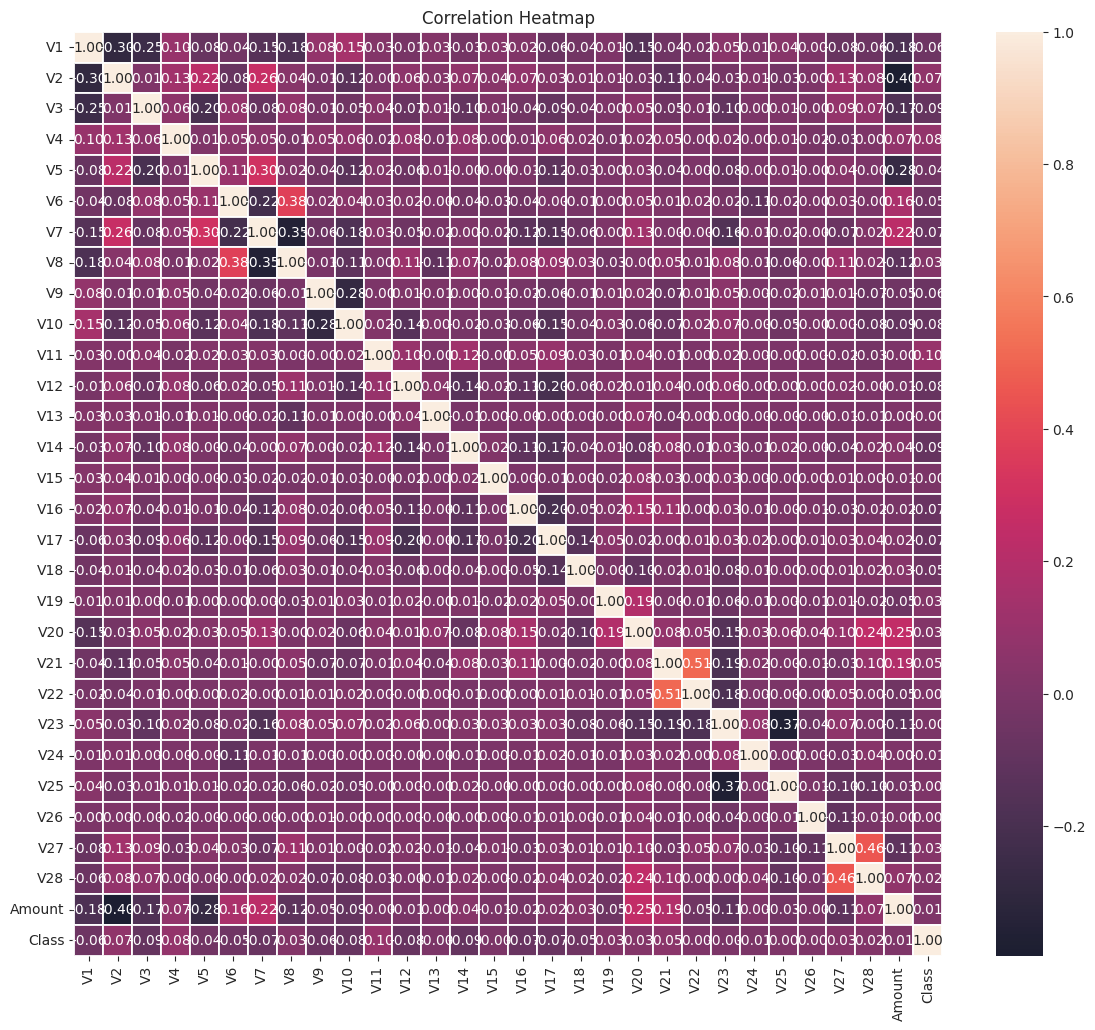

In [12]:
#Creating a heatmap
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,alpha=0.9,fmt=".2f",ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

##### Data Scaling

I scaled the data in Amount column using the Standard Scaler to make it easy for the model to train

In [ ]:
#Importing the Standard Scaler from sklearn library
from sklearn.preprocessing import StandardScaler

#Creating an instance of Standard Scaler
sc = StandardScaler()

#Scaling the data in the Amount column
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [62]:
#Displaying the first 5 rows of the dataset
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.955036,1.109969,-0.121359,-1.829171,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [63]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Target Distribution

Creating a pie chart for the distribution of data in Class column

In [64]:
#Importing the required libraries
import plotly.graph_objs as go
import plotly.offline as py

#Categorizing the values in Class column
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

trace = go.Pie(labels = ['Normal', 'Fraud'], values = data['Class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))

layout = dict(title =  'Distribution of target variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Handling Imbalanced dataset


It is evident that our dataset is imbalanced. I am going to use SMOTE for oversampling of the data to get a balanced dataset. SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.

In [65]:
#Creating a Feature matrix and a response matrix
X = data.drop('Class', axis=1)
y = data['Class']

In [66]:
#Getting the shape of the X matrix
X.shape

(284807, 29)

In [67]:
#Getting the shape of Y matrix
y.shape

(284807,)

In [68]:
#Importing SMOTE to perform oversampling
from imblearn.over_sampling import SMOTE

In [69]:
#Oversampling the data
X_res, y_res = SMOTE().fit_resample(X,y)

Text(0.5, 1.0, 'Class column value counts')

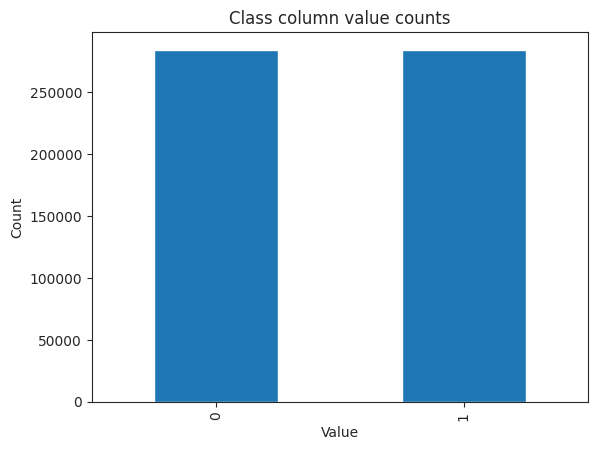

In [72]:
#Verifying equal number of rows in both datasets

plt2 = y_res.value_counts().plot(kind='bar')
plt2.set_xlabel('Value')
plt2.set_ylabel('Count')
plt2.set_title('Class column value counts')



In [73]:
#Getting the splits of dataset to train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20, random_state=42)

## Logistic regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

In [74]:
#Importing the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

#Creating an instance of Regression model
log = LogisticRegression()

#Fitting the data in the model
log.fit(X_train, y_train)

LogisticRegression()

In [75]:
#Predicting the values from the mdoel
y_pred1 = log.predict(X_test)

In [76]:
#Importing the accuracy score
from sklearn.metrics import accuracy_score

#Getting the accuracy score
accuracy_score(y_test, y_pred1)

0.9484902309058615

In [77]:
#Importing the precision_score, recall_score and f1_score metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [78]:
#Getting the precision score
precision_score(y_test, y_pred1)

0.9683880662659434

In [79]:
#Getting the recall score 
recall_score(y_test, y_pred1)

0.9274606852007863

In [80]:
#Getting the f1_score
f1_score(y_test, y_pred1)

0.9474826077601664

## Decision Tree Classifier

Decision tree classifiers are supervised machine learning models. They use prelabelled data in order to train an algorithm that can be used to make a prediction

In [81]:
#Importing the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Creating an instance of Decision Tree Classifier
dt = DecisionTreeClassifier()

#Fitting the data in the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
#Predicting the data using the model
y_pred2 = dt.predict(X_test)

In [83]:
#Getting the accuracy score
accuracy_score(y_test, y_pred2)

0.9984172484744034

In [84]:
#Getting the precision score
precision_score(y_test, y_pred2)

0.9976517594280107

In [85]:
#Getting the recall score
recall_score(y_test, y_pred2)

0.9991926425161471

In [86]:
#Getting the f1 score
f1_score(y_test, y_pred2)

0.9984216064538758

## Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [87]:
#Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Creating an instance of Random Forest Classifier
rf = RandomForestClassifier()

#Fitting the data with the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
#Predicting the dataset using the model
y_pred3 = rf.predict(X_test)

In [89]:
#Getting the accuracy score
accuracy_score(y_test, y_pred3)

0.9998768971035648

In [90]:
#Getting the precision score
precision_score(y_test, y_pred3)

0.9997543428671697

In [91]:
#Getting the recall score
recall_score(y_test, y_pred3)

1.0

In [92]:
#Getting the f1 score
f1_score(y_test, y_pred3)

0.9998771563448748

## KNN Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(n_neighbors=3)

knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
y_pred4 = knnc.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred4)

0.9992262103652639

In [96]:
#Getting the precision score
precision_score(y_test, y_pred4)

0.9984578718631711

In [97]:
#Getting the recall score
recall_score(y_test, y_pred4)

1.0

In [98]:
#Getting the f1 score
f1_score(y_test, y_pred4)

0.9992283409330059

#### Comparing models

In [99]:
#Visualizing the data for comparisons
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF', 'KNN'], 'ACC': [accuracy_score(y_test, y_pred1)*100,
                                                    accuracy_score(y_test, y_pred2)*100,
                                                    accuracy_score(y_test, y_pred3)*100,
                                                    accuracy_score(y_test, y_pred4)*100
                                                    ]})

In [100]:
#Displaying the final data
final_data

,Models,ACC
0,LR,94.849023
1,DT,99.841725
2,RF,99.987690
3,KNN,99.922621


After analyzing the accuracy score from all the models, we choose the <b>Random Forest Classifier</b> to be the best having the highest accuracy score. We will predict our values using this model.

## Saving the model

Training the model and saving it in the directory using <b>joblib</b> library.

In [101]:
#Creating an instance of Random Forest Classifier
rf1 = RandomForestClassifier()

#Fitting the data with the model
rf1.fit(X_res, y_res)

RandomForestClassifier()

In [102]:
#Importing the joblib library
import joblib

In [103]:
#Saving the model
joblib.dump(rf1, 'credit_card_model')

['credit_card_model']

In [104]:
#Saving the model
joblib.dump(rf1, 'ccf_model')

['ccf_model']

In [105]:
#Loading the model for testing
model = joblib.load('ccf_model')

In [110]:
#Getting the prediction from the model
pred = model.predict([[1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,125]])



/home/vishesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [111]:
#Displaying the output
if pred==0:
  print('Normal Transaction')
else:
  print('Fraud Transaction')

Normal Transaction


## GUI Implementation

In [113]:
#Importing the tkinter library to form a GUI
from tkinter import *

#Importing the required libraries
import joblib
import matplotlib
matplotlib.use('Agg')

#Creating a function to create the fields
def show_entry_fields():
  v1=float(e1.get())
  v2=float(e2.get())
  v3=float(e3.get())
  v4=float(e4.get())
  v5=float(e5.get())
  v6=float(e6.get())

  v7=float(e7.get())
  v8=float(e8.get())
  v9=float(e9.get())
  v10=float(e10.get())
  v11=float(e11.get())
  v12=float(e12.get())

  v13=float(e13.get())
  v14=float(e14.get())
  v15=float(e15.get())
  v16=float(e16.get())
  v17=float(e17.get())
  v18=float(e18.get())

  v19=float(e19.get())
  v20=float(e20.get())
  v21=float(e21.get())
  v22=float(e22.get())
  v23=float(e23.get())
  v24=float(e24.get())

  v25=float(e25.get())
  v26=float(e26.get())
  v27=float(e27.get())
  v28=float(e28.get())
  v29=float(e29.get())

  #Loading the model
  model = joblib.load('ccf_model')
  #Predicting the values from the model
  y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])

  #Creating a list of values entered by the user
  list1 = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

  #Creating an empty array to store the results
  result = []

  #Displaying the results
  if y_pred == 0:
    result.append('NORMAL TRANSACTION')
  else:
    result.append('FRAUD TRANSACTION')

  print('**************************************************')
  print('Credit Card Fraud Detection System', result)
  print('**************************************************')


  Label(master, text='Final Prediction').grid(row=31)
  Label(master, text=result).grid(row=32)

#Creating an instance of tkinter
master = Tk()

#Setting the title of the GUI
master.title('Credit Card Fraud Detection System')  

#Creating labels for all the fields
Label(master, text='Enter value for v1').grid(row=1)
Label(master, text='Enter value for v2').grid(row=2)
Label(master, text='Enter value for v3').grid(row=3)
Label(master, text='Enter value for v4').grid(row=4)
Label(master, text='Enter value for v5').grid(row=5)
Label(master, text='Enter value for v6').grid(row=6)
Label(master, text='Enter value for v7').grid(row=7)
Label(master, text='Enter value for v8').grid(row=8)
Label(master, text='Enter value for v9').grid(row=9)
Label(master, text='Enter value for v10').grid(row=10)
Label(master, text='Enter value for v11').grid(row=11)
Label(master, text='Enter value for v12').grid(row=12)
Label(master, text='Enter value for v13').grid(row=13)
Label(master, text='Enter value for v14').grid(row=14)
Label(master, text='Enter value for v15').grid(row=15)

Label(master, text='Enter value for v16').grid(row=16)
Label(master, text='Enter value for v17').grid(row=17)
Label(master, text='Enter value for v18').grid(row=18)
Label(master, text='Enter value for v19').grid(row=19)
Label(master, text='Enter value for v20').grid(row=20)
Label(master, text='Enter value for v21').grid(row=21)
Label(master, text='Enter value for v22').grid(row=22)
Label(master, text='Enter value for v23').grid(row=23)
Label(master, text='Enter value for v24').grid(row=24)
Label(master, text='Enter value for v25').grid(row=25)
Label(master, text='Enter value for v26').grid(row=26)
Label(master, text='Enter value for v27').grid(row=27)
Label(master, text='Enter value for v28').grid(row=28)
Label(master, text='Enter amount of transaction').grid(row=29)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23 = Entry(master)
e24 = Entry(master)
e25 = Entry(master)
e26 = Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)
e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)
e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)

#Creating a button to predict the results
Button(master, text='PREDICT', command=show_entry_fields).grid(row=30, column=1)
mainloop()
  

/home/vishesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



**************************************************
Credit Card Fraud Detection System ['NORMAL TRANSACTION']
**************************************************
